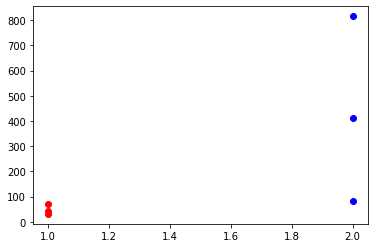

In [2]:
import matplotlib.pyplot as plt
import pandas as pandas
import numpy as np
#Part 2.1 – Generation of random solutions
#Use Modules.txt in this one
#Header is set to none as there's no header in the txt file
data = pandas.read_table("modules.txt",header=None)
#print(data)
inputs = data.values[:,:].astype(str)
#print (inputs[3,0])
DataAsArray = []
for i in range(17):
    #print(i)
    #print(inputs[i,0])
    inString = inputs[i,0]
    CommaString = inString.replace("|",",")
    #print(CommaString)
    NewArray = CommaString.split(",")
    DataAsArray.append(NewArray)
    

#print (DataAsArray[1])
    
    


#Use the fitness function evaluate them
def fitnessFunction(inSolution):
    #print(inSolution)
    conConstraints = 0
    preConstraints = 0
    for i in range(7):
        for session in inSolution[i]:
            SplitString = session.split(",")
            ModArrayPos = int(SplitString[0][-3:]) -1
            ClashingModules = []
            for q in range(len(DataAsArray[ModArrayPos])):
                if(q > 2):
                    ClashingModules.append(DataAsArray[ModArrayPos][q])
            #print(SplitString[0] + " 's clashing modules'")
            #print(ClashingModules)
                
            
            #Make a concurrence check
            for session2 in inSolution[i]:
                SplitString2 = session2.split(",")
                #Check for clashes.
                #print("Checking module " + SplitString2[0] + "is clashing with " + SplitString[0])
                if(SplitString2[0] in ClashingModules):
                    #Adding 0.5 as all clashes are found twice
                    #Clashes are being found twice this needs fixing
                    conConstraints +=0.5
                    #print ("Clash found")
                    
            
             
            #Make a precedence check
            LecFound = False
            if SplitString[1] == "Lab":
                #if i == 0:
                    #print(SplitString[0] + "was in day 1 and thus would violate this")
                    #preConstraints +=1
                #else:
                for j in range(i+1):
                    #print("j")
                    #print(j)
                    if LecFound == True:
                        break
                    for session2 in inSolution[j]:
                        SplitString2 = session2.split(",")
                        #print ("Checking " + SplitString[0] + SplitString[1] + " against " + SplitString2[0] + SplitString2[1] )
                        if SplitString2[0] == SplitString[0] and SplitString2[1] == "Lec":
                            #print("Lec Was found for " + SplitString2[0])
                            LecFound = True
                            break
                            
                if LecFound == False:
                    #print(SplitString[0] + "No prior lecture was found for a lab of this module")
                    preConstraints +=1
                            
                    
            
            
            
    #print(conContraints)
    if(preConstraints == 0 and conConstraints != 0):
        preConstraints = 1
    elif(preConstraints != 0 and conConstraints == 0):
        conConstraints = 1
    result = preConstraints * conConstraints
    return result

#20 Sessions per week
#One lecture theatre
#Two labs
def genRandSolution():
    Week = []
    for i in range(7):
        Day = []
        Week.append(Day)
        
    
    SessionsToSchedule = []    
    for i in range(17):
            for j in range(int(DataAsArray[i][2])):
                #print(i)
                if (j == 0):
                    SessionsToSchedule.append(DataAsArray[i][0] + ",Lec")
                
                else:
                    SessionsToSchedule.append(DataAsArray[i][0] + ",Lab")
                    
                    
    #print(SessionsToSchedule)
                    
                    
    for session in SessionsToSchedule:
        randNumber = np.random.randint(7)
        #print(randNumber)
        Week[randNumber].append(session)
            
    return Week
#randSolution = genRandSolution()
#fitness = fitnessFunction(randSolution)
#print(randSolution)
#print (fitness)
    

#Part 2.2 - Algorithm implementation
#Add a mutation operator and store previous results

#All previous results need to be stored
#Domination should be considered, e.g when a solution is superior in the measured areas.
def ruinRecreate(numIterations,NumSolutions):
    solutions = []
    for j in range (NumSolutions):
        #print(str(j) + " j is this")
        for i in range (numIterations):
            #print(str(i) + " i is this")
            if (i == 0):
                keptsolution = genRandSolution()
            solution2 = genRandSolution()
            if(fitnessFunction(keptsolution) > fitnessFunction(solution2)):
                keptsolution = solution2
        solutions.append(keptsolution)
        
    return solutions
    
def sessionReplace(numIterations,NumSolutions):
    solutions = []
    for j in range (NumSolutions):
        for i in range (numIterations):
            if (i == 0):
                keptsolution = genRandSolution()
            solution2 = keptsolution
            ArrLength = 0
            while ArrLength == 0:
                randDayNum = np.random.randint(7)
                ArrLength = len(solution2[randDayNum])             
            randSesNum = np.random.randint(ArrLength)
            SessionGrabbed = solution2[randDayNum][randSesNum]
            solution2[randDayNum].pop(randSesNum)
            newDayNum = np.random.randint(7)
            solution2[newDayNum].append(SessionGrabbed)
            if(fitnessFunction(keptsolution) > fitnessFunction(solution2)):
                keptsolution = solution2
        #print("Solution Added")
        solutions.append(keptsolution)
    return solutions

ruinSolutions = ruinRecreate(500,30)
#print(ruinSolutions)
replaceSolutions = sessionReplace(500,30)
#print(replaceSolutions)
    

#Part 2.3 - Visualisation of results
#Identify which solution is best
#A graph should show the results.
#Have a graph showing how all solutions fare on the measured areas and pick the one that best balances them

#Get min, max and average fitness from both operators.
ruinFitness = []
replaceFitness = []
for solution in ruinSolutions:
    solutionFitness = fitnessFunction(solution)
    ruinFitness.append(solutionFitness)
#print(ruinFitness)
#print(max(ruinFitness))
#print(min(ruinFitness))
#print(np.mean(ruinFitness))
    
#print(ruinFitness[15])
for solution in replaceSolutions:
    solutionFitness = fitnessFunction(solution)
    replaceFitness.append(solutionFitness)
#print(replaceFitness)
#The ruin and recreate mutator performs vastly better than the session replace one, likely due to me only coding in a single random replace per loop.
plt.scatter(1,max(ruinFitness),color = 'red')
plt.scatter(1,min(ruinFitness),color = 'red')
plt.scatter(1,np.mean(ruinFitness),color = 'red')

plt.scatter(2,max(replaceFitness),color = 'blue')
plt.scatter(2,min(replaceFitness),color = 'blue')
plt.scatter(2,np.mean(replaceFitness),color = 'blue')
plt.show()